In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import image
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, SpatialDropout2D, Flatten, Dropout, Dense
from keras.preprocessing.image import ImageDataGenerator

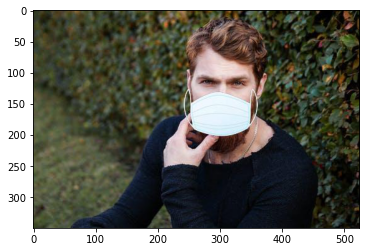

In [2]:
img = image.load_img('F:/Netzwerk/Deep Learning/Mask detection/Train/With_mask/0-with-mask.jpg')
plt.imshow(img)

In [3]:
cv2.imread('F:/Netzwerk/Deep Learning/Mask detection/Train/With_mask/0-with-mask.jpg')

array([[[38, 66, 60],
        [35, 63, 57],
        [32, 59, 50],
        ...,
        [ 9, 37, 31],
        [18, 41, 36],
        [11, 28, 24]],

       [[35, 63, 57],
        [32, 60, 54],
        [31, 58, 49],
        ...,
        [13, 39, 33],
        [20, 43, 38],
        [13, 31, 24]],

       [[30, 58, 52],
        [31, 57, 51],
        [29, 56, 47],
        ...,
        [16, 40, 32],
        [22, 45, 37],
        [19, 36, 27]],

       ...,

       [[30, 71, 56],
        [33, 72, 57],
        [33, 72, 57],
        ...,
        [12, 12, 18],
        [12, 12, 18],
        [12, 12, 18]],

       [[27, 68, 53],
        [28, 69, 54],
        [30, 69, 54],
        ...,
        [13, 13, 19],
        [13, 12, 21],
        [13, 12, 21]],

       [[24, 68, 51],
        [27, 69, 52],
        [29, 68, 53],
        ...,
        [13, 12, 21],
        [13, 12, 21],
        [13, 12, 21]]], dtype=uint8)

In [4]:
cv2.imread('F:/Netzwerk/Deep Learning/Mask detection/Train/With_mask/0-with-mask.jpg').shape

(350, 525, 3)

In [5]:
# Normalize the image by deviding by 255
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

In [6]:
# Convert the training images to a dataset that can be feeded to NN
train_dataset = train.flow_from_directory('F:/Netzwerk/Deep Learning/Mask detection/train',
                                          target_size = (150,150),
                                          batch_size = 16,
                                          class_mode = 'binary')
test_dataset = test.flow_from_directory('F:/Netzwerk/Deep Learning/Mask detection/test',
                                          target_size = (150,150),
                                          batch_size = 16,
                                          class_mode = 'binary')
                                          

Found 1108 images belonging to 2 classes.
Found 470 images belonging to 2 classes.


In [7]:
train_dataset.class_indices

{'With_mask': 0, 'Without_mask': 1}

In [8]:
train_dataset.classes

array([0, 0, 0, ..., 1, 1, 1])

In [9]:
train_dataset.classes.shape

(1108,)

In [10]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
model_saved = model.fit_generator(train_dataset, epochs=10)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
70/70 [==============================] - 21s 299ms/step - loss: 0.5588 - accuracy: 0.7004
Epoch 2/10
70/70 [==============================] - 21s 303ms/step - loss: 0.3094 - accuracy: 0.8655
Epoch 3/10
70/70 [==============================] - 21s 302ms/step - loss: 0.2640 - accuracy: 0.8854
Epoch 4/10
70/70 [==============================] - 21s 304ms/step - loss: 0.2076 - accuracy: 0.9097
Epoch 5/10
70/70 [==============================] - 21s 299ms/step - loss: 0.1828 - accuracy: 0.9206
Epoch 6/10
70/70 [==============================] - 21s 299ms/step - loss: 0.1269 - accuracy: 0.9540
Epoch 7/10
70/70 [==============================] - 21s 301ms/step - loss: 0.0998 - accuracy: 0.9576
Epoch 8/10
70/70 [==============================] - 21s 300ms/step - loss: 0.0864 - accuracy: 0.9684
Epoch 9/10
70/70 [==============================] - 21s 296ms/step - loss: 0.0444 - accuracy: 0.9829
Epoch 10/10
70/

[[1.]]
No Mask


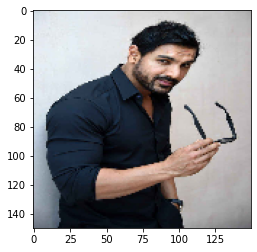

In [22]:
img_prd = image.load_img('G:/New folder/3.jpg', target_size=(150,150))
p = image.img_to_array(img_prd)
p = np.expand_dims(p, axis = 0)
res = model.predict(p)
print(res)
if res == 0:
    print("Mask")
else:
    print("No Mask")

plt.imshow(img_prd)